# Lampiran Preprocessing Data

> No Peserta: 24-3-1

## Impor Modul

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [205]:
# X_train_raw = pd.read_csv('train_features.csv', parse_dates=['tanggal_menjadi_anggota'])
X_train_raw = pd.read_csv('train_features.csv')
X_train_raw.shape
X_train_raw.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [206]:
y_train_raw = pd.read_csv('train_labels.csv')
y_train_raw.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


In [207]:
print("Shape")
print("X:", X_train_raw.shape)
print("Y:", y_train_raw.shape)

Shape
X: (3817, 16)
Y: (3817, 1)


In [208]:
X_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [209]:
y_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   jumlah_promosi  3817 non-null   int64
dtypes: int64(1)
memory usage: 29.9 KB


In [210]:
categorical_columns = X_train_raw.select_dtypes(include=['object']).columns
categorical_columns

Index(['pendidikan', 'status_pernikahan', 'tanggal_menjadi_anggota'], dtype='object')

In [211]:
X_train_raw.isnull().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

In [212]:
y_train_raw.isnull().sum()

jumlah_promosi    0
dtype: int64

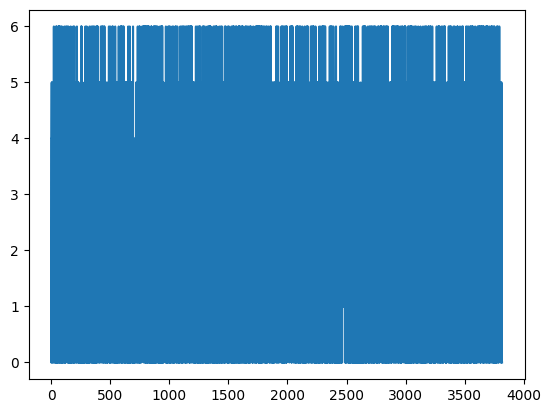

In [213]:
plt.plot(y_train_raw)

<Axes: >

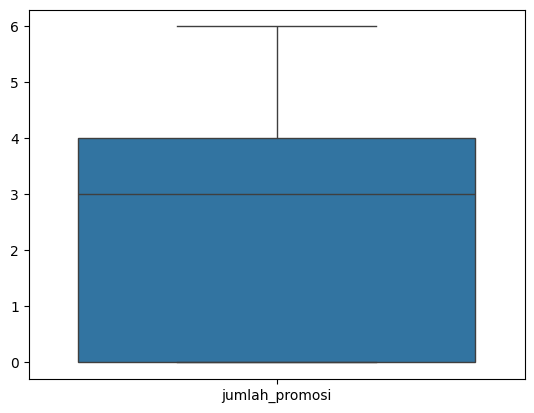

In [214]:
sns.boxplot(y_train_raw)

In [215]:
# Nilai unik setiap kolom
for features_list in categorical_columns:
    features = X_train_raw[features_list].unique()
    print("#"*25)
    print(f"{features_list.title()} Variables : {features} \nPiece:{len(features)}")

#########################
Pendidikan Variables : ['Sarjana' 'Magister' 'SMA' 'SMP' 'Doktor' nan '5'] 
Piece:7
#########################
Status_Pernikahan Variables : ['Rencana Menikah' 'Menikah' 'Sendiri' 'Cerai' nan 'Cerai Mati' '5'] 
Piece:7
#########################
Tanggal_Menjadi_Anggota Variables : ['2014-05-05' '2013-03-17' nan '2013-05-03' '2013-11-21' '2012-11-14'
 '2013-06-23' '2012-10-06' '2013-02-11' '2014-03-28' '2012-11-10'
 '2013-05-02' '2013-01-18' '2014-01-10' '2014-03-14' '2014-02-18'
 '2013-07-06' '2014-02-27' '2014-01-25' '2013-07-05' '2013-05-08'
 '2013-03-30' '2014-06-11' '2013-03-31' '2012-11-06' '2013-04-14'
 '2013-03-12' '2013-05-31' '2013-05-17' '2012-09-13' '2013-09-12'
 '2014-05-14' '2014-05-09' '2013-10-15' '2013-09-06' '2012-12-10'
 '2013-04-13' '2014-03-17' '2013-08-08' '2012-08-19' '2013-01-16'
 '2014-05-23' '2013-03-29' '2014-06-27' '2012-09-06' '2013-09-02'
 '2013-02-19' '2013-02-10' '2013-05-26' '2014-03-03' '2013-04-07'
 '2014-05-26' '2014-01-26' '20

## Imputasi Missing Value dengan KNN

In [216]:
features = X_train_raw.columns

In [217]:
# Membuat kamus untuk melakukan pemetaan antara nilai pendidikan dan nilai pendidikan_encoded
mapping_pendidikan = {
    'SMP': 0,
    'SMA': 1,
    'Sarjana': 2,
    'Magister': 3,
    'Doktor': 4,
    '5': 4
}
# Membuat reverse_mapping secara otomatis berdasarkan mapping
reverse_mapping_pendidikan = {value: key for key, value in mapping_pendidikan.items()}

# Menggunakan fungsi map() untuk menggantikan nilai pendidikan dengan nilai pendidikan_encoded
X_train_raw['pendidikan_encoded'] = X_train_raw['pendidikan'].map(mapping_pendidikan)

# Inisialisasi LabelEncoder dengan urutan yang diinginkan
label_encoder = LabelEncoder()

# Transformasi data pendidikan
X_train_raw['pendidikan_encoded'] = label_encoder.fit_transform(X_train_raw['pendidikan_encoded'])
X_train_raw['pendidikan_encoded'].unique()

array([2, 3, 1, 0, 4, 5], dtype=int64)

In [218]:
X_train_raw['pendidikan_encoded'] = X_train_raw['pendidikan_encoded'].replace(5, np.nan)

In [219]:
# Membuat kamus untuk melakukan pemetaan antara nilai status_pernikahan dan nilai status_pernikahan_encoded
mapping_status_pernikahan = {
    'Sendiri': 0,
    'Rencana Menikah': 1,
    'Menikah': 2,
    'Cerai': 3,
    'Cerai Mati': 4,
    '5': 4
}
# Membuat reverse_mapping secara otomatis berdasarkan mapping
reverse_mapping_status_pernikahan = {value: key for key, value in mapping_status_pernikahan.items()}

# Menggunakan fungsi map() untuk menggantikan nilai status_pernikahan dengan nilai status_pernikahan_encoded
X_train_raw['status_pernikahan_encoded'] = X_train_raw['status_pernikahan'].map(mapping_status_pernikahan)

# Inisialisasi LabelEncoder dengan urutan yang diinginkan
label_encoder = LabelEncoder()

# Transformasi data status_pernikahan
X_train_raw['status_pernikahan_encoded'] = label_encoder.fit_transform(X_train_raw['status_pernikahan_encoded'])
X_train_raw['status_pernikahan_encoded'].unique()

array([1, 2, 0, 3, 5, 4], dtype=int64)

In [220]:
X_train_raw['status_pernikahan_encoded'] = X_train_raw['status_pernikahan_encoded'].replace(5, np.nan)

In [221]:
# Data tanggal_menjadi_anggota
tanggal_menjadi_anggota = X_train_raw['tanggal_menjadi_anggota']
tanggal_menjadi_anggota_encoded = tanggal_menjadi_anggota.copy()

# Inisialisasi LabelEncoder dengan urutan yang diinginkan
label_encoder_tanggal = LabelEncoder()

# Transformasi data tanggal_menjadi_anggota
tanggal_menjadi_anggota_encoded = label_encoder_tanggal.fit_transform(tanggal_menjadi_anggota_encoded)

X_train_raw['tanggal_menjadi_anggota_encoded'] = tanggal_menjadi_anggota_encoded
X_train_raw['tanggal_menjadi_anggota_encoded'].unique()

array([519, 186, 564, 226, 385,  85, 265,  53, 158, 486,  81, 225, 137,
       424, 475, 454, 276, 461, 435, 275, 230, 198, 549, 199,  79, 211,
       182, 250, 239,  35, 328, 528, 523, 356, 323, 107, 210, 477, 302,
        15, 135, 535, 197, 561,  29, 320, 166, 157, 247, 465, 205, 538,
       436, 406, 431, 310, 357, 479, 272, 355, 414,  97,  22, 344, 208,
       178,   4, 363, 405, 459, 520, 218, 116, 304, 117,  19, 410, 256,
       222, 541, 330, 360,  48, 162, 560,  39, 367, 306, 327, 204, 102,
        47, 296, 472,   0, 540,  16,  60, 362, 469,  94, 458, 434, 142,
       497,  83, 369, 217, 500,  11, 141, 491,  62, 176, 337, 325, 140,
       493, 220, 246, 342, 499, 485,  26,  70, 487, 383, 257, 524, 343,
        17, 151, 489, 150,  90,  42,  24, 258, 353,  88, 338, 512, 184,
       300, 121, 505, 313, 223, 504, 510,  64,  69, 268, 105, 187, 112,
       506, 543, 521, 371, 346, 274, 433,  31, 516, 110, 238, 259, 445,
       401, 252,  32, 288, 160, 113, 413, 273, 200,  99, 563, 55

In [222]:
X_train_raw['tanggal_menjadi_anggota_encoded'] = X_train_raw['tanggal_menjadi_anggota_encoded'].replace(564, np.nan)

In [223]:
data = X_train_raw.drop(columns=['pendidikan', 'status_pernikahan', 'tanggal_menjadi_anggota'])
data

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,pendidikan_encoded,status_pernikahan_encoded,tanggal_menjadi_anggota_encoded
0,1979,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2.0,1.0,519.0
1,1950,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2.0,1.0,186.0
2,1966,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,2.0,2.0,NaN
3,1961,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,3.0,1.0,NaN
4,1970,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,3.0,2.0,NaN
3813,1947,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,4.0,1.0,547.0
3814,1974,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,3.0,2.0,375.0
3815,1957,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,1.0,1.0,270.0


In [224]:
# Kolom yang ingin diimputasi
imputed_column = data.columns

# Buat imputer hanya untuk kolom yang diinginkan
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data[imputed_column])

# Ganti kolom-kolom yang diimputasi dengan hasil imputasi
data_imputed = data.copy()
data_imputed[imputed_column] = imputed_data

# Tampilkan DataFrame hasil imputasi
data_imputed.head(n=5)

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,pendidikan_encoded,status_pernikahan_encoded,tanggal_menjadi_anggota_encoded
0,1979.0,107057433.0,0.0,1.0,27.8,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2.0,1.0,519.0
1,1950.0,84063000.0,0.6,0.0,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2.0,1.0,186.0
2,1966.0,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,2.0,2.0,325.8
3,1961.0,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,3.0,1.0,351.2
4,1970.0,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,2.0,1.0,349.6


In [225]:
data_imputed.isnull().sum()

tahun_kelahiran                    0
pendapatan                         0
jumlah_anak_balita                 0
jumlah_anak_remaja                 0
terakhir_belanja                   0
belanja_buah                       0
belanja_daging                     0
belanja_ikan                       0
belanja_kue                        0
pembelian_diskon                   0
pembelian_web                      0
pembelian_toko                     0
keluhan                            0
pendidikan_encoded                 0
status_pernikahan_encoded          0
tanggal_menjadi_anggota_encoded    0
dtype: int64

Missing value sudah tertangani

In [229]:
data_reverse = data_imputed.copy()
data_reverse['pendidikan'] = data_reverse['pendidikan_encoded'].map(reverse_mapping_pendidikan)
data_reverse['status_pernikahan'] = data_reverse['status_pernikahan_encoded'].map(reverse_mapping_status_pernikahan)
tanggal_menjadi_anggota_encoded = data_reverse['tanggal_menjadi_anggota_encoded'].astype(int)
tanggal_menjadi_anggota_decoded = label_encoder_tanggal.inverse_transform(tanggal_menjadi_anggota_encoded)
data_reverse['tanggal_menjadi_anggota'] = tanggal_menjadi_anggota_decoded
data_reverse = data_reverse[features]
data_reverse

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979.0,Sarjana,Rencana Menikah,107057433.0,0.0,1.0,27.8,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950.0,Sarjana,Rencana Menikah,84063000.0,0.6,0.0,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966.0,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,2013-09-08
3,1961.0,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,2013-10-09
4,1970.0,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,2013-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955.0,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,2013-09-17
3813,1947.0,5,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,7679.0,0.0,3.0,6.0,3.0,0.0,2014-06-09
3814,1974.0,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07
3815,1957.0,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,16568.2,4.0,5.0,4.0,0.0,2013-06-30


In [230]:
data_encoded = data_imputed.copy()
data_encoded['pendidikan'] = data_encoded['pendidikan_encoded']
data_encoded['status_pernikahan'] = data_encoded['status_pernikahan_encoded']
data_encoded['tanggal_menjadi_anggota'] = data_encoded['tanggal_menjadi_anggota_encoded'].astype(int)
data_encoded = data_encoded[features]
data_encoded

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979.0,2.0,1.0,107057433.0,0.0,1.0,27.8,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,519
1,1950.0,2.0,1.0,84063000.0,0.6,0.0,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,186
2,1966.0,2.0,2.0,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,325
3,1961.0,3.0,1.0,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,351
4,1970.0,2.0,1.0,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955.0,3.0,2.0,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,333
3813,1947.0,4.0,1.0,109306000.0,0.0,1.0,44.0,0.0,50575.0,7679.0,0.0,3.0,6.0,3.0,0.0,547
3814,1974.0,3.0,2.0,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,375
3815,1957.0,1.0,1.0,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,16568.2,4.0,5.0,4.0,0.0,270


In [232]:
data_reverse.to_csv('train_features_ImputasiKNN.csv', index=True)
data_encoded.to_csv('train_features_ImputasiKNN_encoded.csv', index=True)